# Exercise with Natural Language Processing

For todays exersice we will be doing two things.  The first is to build the same model with the same data that we did in the lecture, the second will be to build a new model with new data. 

## PART 1: 
- 20 Newsgroups Corpus
0. Inspect data
0. Clean and Process Text
0. Vectorize your text
0. Classify your text using Multinomial Naive Bayes
0. Classify your text using Random Forest. 
0. Eval your models.  
0. Classify a NEW PIECE of text. Any string you want to feed it. 


## PART 2:
- Republican vs Democrat Tweet Classifier
0.  This is self guided, can you get a f1 above 82%?  -its not easy.

In [1]:
## IMPORT YOUR LIBS HERE
# Import pandas for data handling
import pandas as pd

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# Import our metrics to evaluate our model
from sklearn import metrics

# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for helping us with text
import string
# Regular Expression Library
import re

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kaguy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kaguy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kaguy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Load and display data.
1. Load the 20-newsgroups.csv data into a dataframe.
1. Print the shape
1. Inspect / remove nulls and duplicates
1. Find class balances, print out how many of each topic_category there are.

In [2]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/20-newsgroups.csv')
print(df.shape)

df.head()

(11314, 4)


,id,message,topic,topic_category
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [3]:
# 3. Inspect / remove nulls and duplicates
print('# of nulls per column: ')
print(df.isnull().sum())
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('# of duplicates: ',df.duplicated().sum())

# of nulls per column: 
id                0
message           0
topic             0
topic_category    0
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# of duplicates:  0


In [4]:
# 4. Find class balances, print out how many of each topic_category there are.
df.topic_category.value_counts()

rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
rec.autos                   594
sci.med                     594
comp.windows.x              593
sci.space                   593
comp.os.ms-windows.misc     591
sci.electronics             591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: topic_category, dtype: int64

# Text Pre-Processing 
(aka Feature engineering)
1. Make a function that makes all text lowercase.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
2. Make a function that removes all punctuation. 
    * Do a sanity check by feeding in a test sentence into the function. 
    
0. EXTRA CREDIT:  
    0. Make a function that stemms all words. 
    0. Make a function that removes all stopwords.

5. Mandatory: Make a pipeline function that applys all the text processing functions you just built.
    * Do a sanity check by feeding in a test sentence into the pipeline. 
    
6. Mandatory: Use `df['message_clean'] = df[column].apply(???)` and apply the text pipeline to your text data column. 

In [5]:
# 1. Make a function that makes all text lowercase.

test_string = 'This is A SENTENCE with LOTS OF CAPS.'

def makeLowercase(input_string):
    return input_string.lower()

makeLowercase(test_string)

'this is a sentence with lots of caps.'

In [6]:
# 2. Make a function that removes all punctuation. 

test_string = 'This is a sentence! 50 With lots of punctuation??? & other #things.'

def removePunctuation(input_string):
    input_string = re.sub(r'[^\w\s]','',input_string)
    return input_string

removePunctuation(test_string)

'This is a sentence 50 With lots of punctuation  other things'

In [7]:
# 3. Make a function that removes all stopwords.

test_string = 'This is a sentence! With some different stopwords i have added in here.'

def removeStopwords(input_string):
    # breaks the sentence down into a list of words
    words = word_tokenize(input_string)
    
    # makes a list to append valid words into
    valid_words = []
    
    # loops through all the words
    for word in words:
        # checks if word is not in stopwords
        if word not in stopwords:
            # if word is not in stopwords, append to valid_words list
            valid_words.append(word)
    
    # joins the list of words together into a string
    input_string = ' '.join(valid_words)
    return input_string

removeStopwords(test_string)

'This sentence ! With different stopwords added .'

In [8]:
# 4. EXTRA CREDIT: Make a function that stemms all words. 

test_string = 'I played and started playing with players and we all love to play with plays'

def stemWords(input_string):
    # Initalize our Stemmer
    porter = PorterStemmer()
    
    # Break the sentence down into a list of words
    words = word_tokenize(input_string)
    
    # Make a list to append valid words into
    valid_words = []

    # Loop through all the words
    for word in words:
        # Stem the word
        stemmed_word = porter.stem(word)
        
        # Append stemmed word to our valid_words
        valid_words.append(stemmed_word)
        
    # Join the list of words together into a string
    input_string = ' '.join(valid_words)

    return input_string

stemWords(test_string)

'i play and start play with player and we all love to play with play'

In [9]:
# 5. MANDATORY: Make a pipeline function that applys all the text processing functions you just built.

test_string = 'I played and started playing with players and we all love to play with plays'

def textPipeline(input_string):
    input_string = makeLowercase(input_string)
    input_string = removePunctuation(input_string)
    input_string = removeStopwords(input_string)
    return input_string

textPipeline(test_string)

'played started playing players love play plays'

In [10]:
# 6. Mandatory: Use `df[column].apply(???)` and apply the text pipeline to your text data column. 

df['message_cleaned'] = df['message'].apply(textPipeline)

print(df['message_cleaned'][0])

lerxstwamumdedu wheres thing subject car nntppostinghost rac3wamumdedu organization university maryland college park lines 15 wondering anyone could enlighten car saw day 2door sports car looked late 60s early 70s called bricklin doors really small addition front bumper separate rest body know anyone tellme model name engine specs years production car made history whatever info funky looking car please email thanks il brought neighborhood lerxst


In [11]:
df.head()

,id,message,topic,topic_category,message_cleaned
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos,lerxstwamumdedu wheres thing subject car nntpp...
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware,guykuocarsonuwashingtonedu guy kuo subject si ...
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware,twillisececnpurdueedu thomas e willis subject ...
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics,jgreenamber joe green subject weitek p9000 org...
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space,jcmheadcfaharvardedu jonathan mcdowell subject...


# Text Vectorization

1. Define your `X` and `y` data. 


2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
    * Do you want to use n-grams..?


3. Fit your vectorizer using your X data.
    * Remember, this process happens IN PLACE.


4. Transform your X data using your fitted vectorizer. 
    * `X = vectorizer.???`



5. Print the shape of your X.  How many features (aka columns) do you have?

In [12]:
# 0. Define your `X` and `y` data. 

X = df['message_cleaned']
y = df['topic_category']


In [13]:
# 1. Train test split your data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [14]:
# 2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
vectorizer = TfidfVectorizer()


In [15]:
# 3. Fit your vectorizer using your X data
vectorizer.fit(X_train)


TfidfVectorizer()

In [16]:
# 4. Transform your X data using your fitted vectorizer. 
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)


In [17]:
# 5. Print the shape of your X.  How many features (aka columns) do you have?
print('Shape of X_train:', X_train.shape)

print('We have 121888 columns represented unique words in the vocab of X_train.')

Shape of X_train: (9051, 121888)
We have 121888 columns represented unique words in the vocab of X_train.


___
# Build and Train Model
Use Multinomial Naive Bayes to classify these documents. 

1. Initalize an empty model. 
2. Fit the model with our training data.


Experiment with different alphas.  Use the alpha gives you the best result.

EXTRA CREDIT:  Use grid search to programmatically do this for you. 

In [18]:
# 1. Initalize an empty model. 
model = MultinomialNB()



In [19]:
# Fit our model with our training data.
model.fit(X_train, y_train)



MultinomialNB()

In [20]:
from sklearn.model_selection import GridSearchCV

params = { 
    'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    }
grid_search_cv =  GridSearchCV(MultinomialNB(), params)

In [21]:
grid_search_cv.fit(X_train, y_train)

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0]})

In [22]:
print(grid_search_cv.best_params_)

{'alpha': 0.1}


In [23]:
model = MultinomialNB(alpha=0.1)
model.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

# Evaluate the model.

1. Make new predicitions using our test data. 
2. Print the accuracy of the model. 
3. Print the confusion matrix of our predictions. 
4. Using `classification_report` print the evaluation results for all the classes. 



In [24]:
# 1. Make new predictions of our testing data. 
y_pred = model.predict(X_test)

y_pred_proba = model.predict_proba(X_test)

In [25]:
# 2. Print the accuracy of the model. 
accuracy = model.score(X_test, y_test)

print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.911180


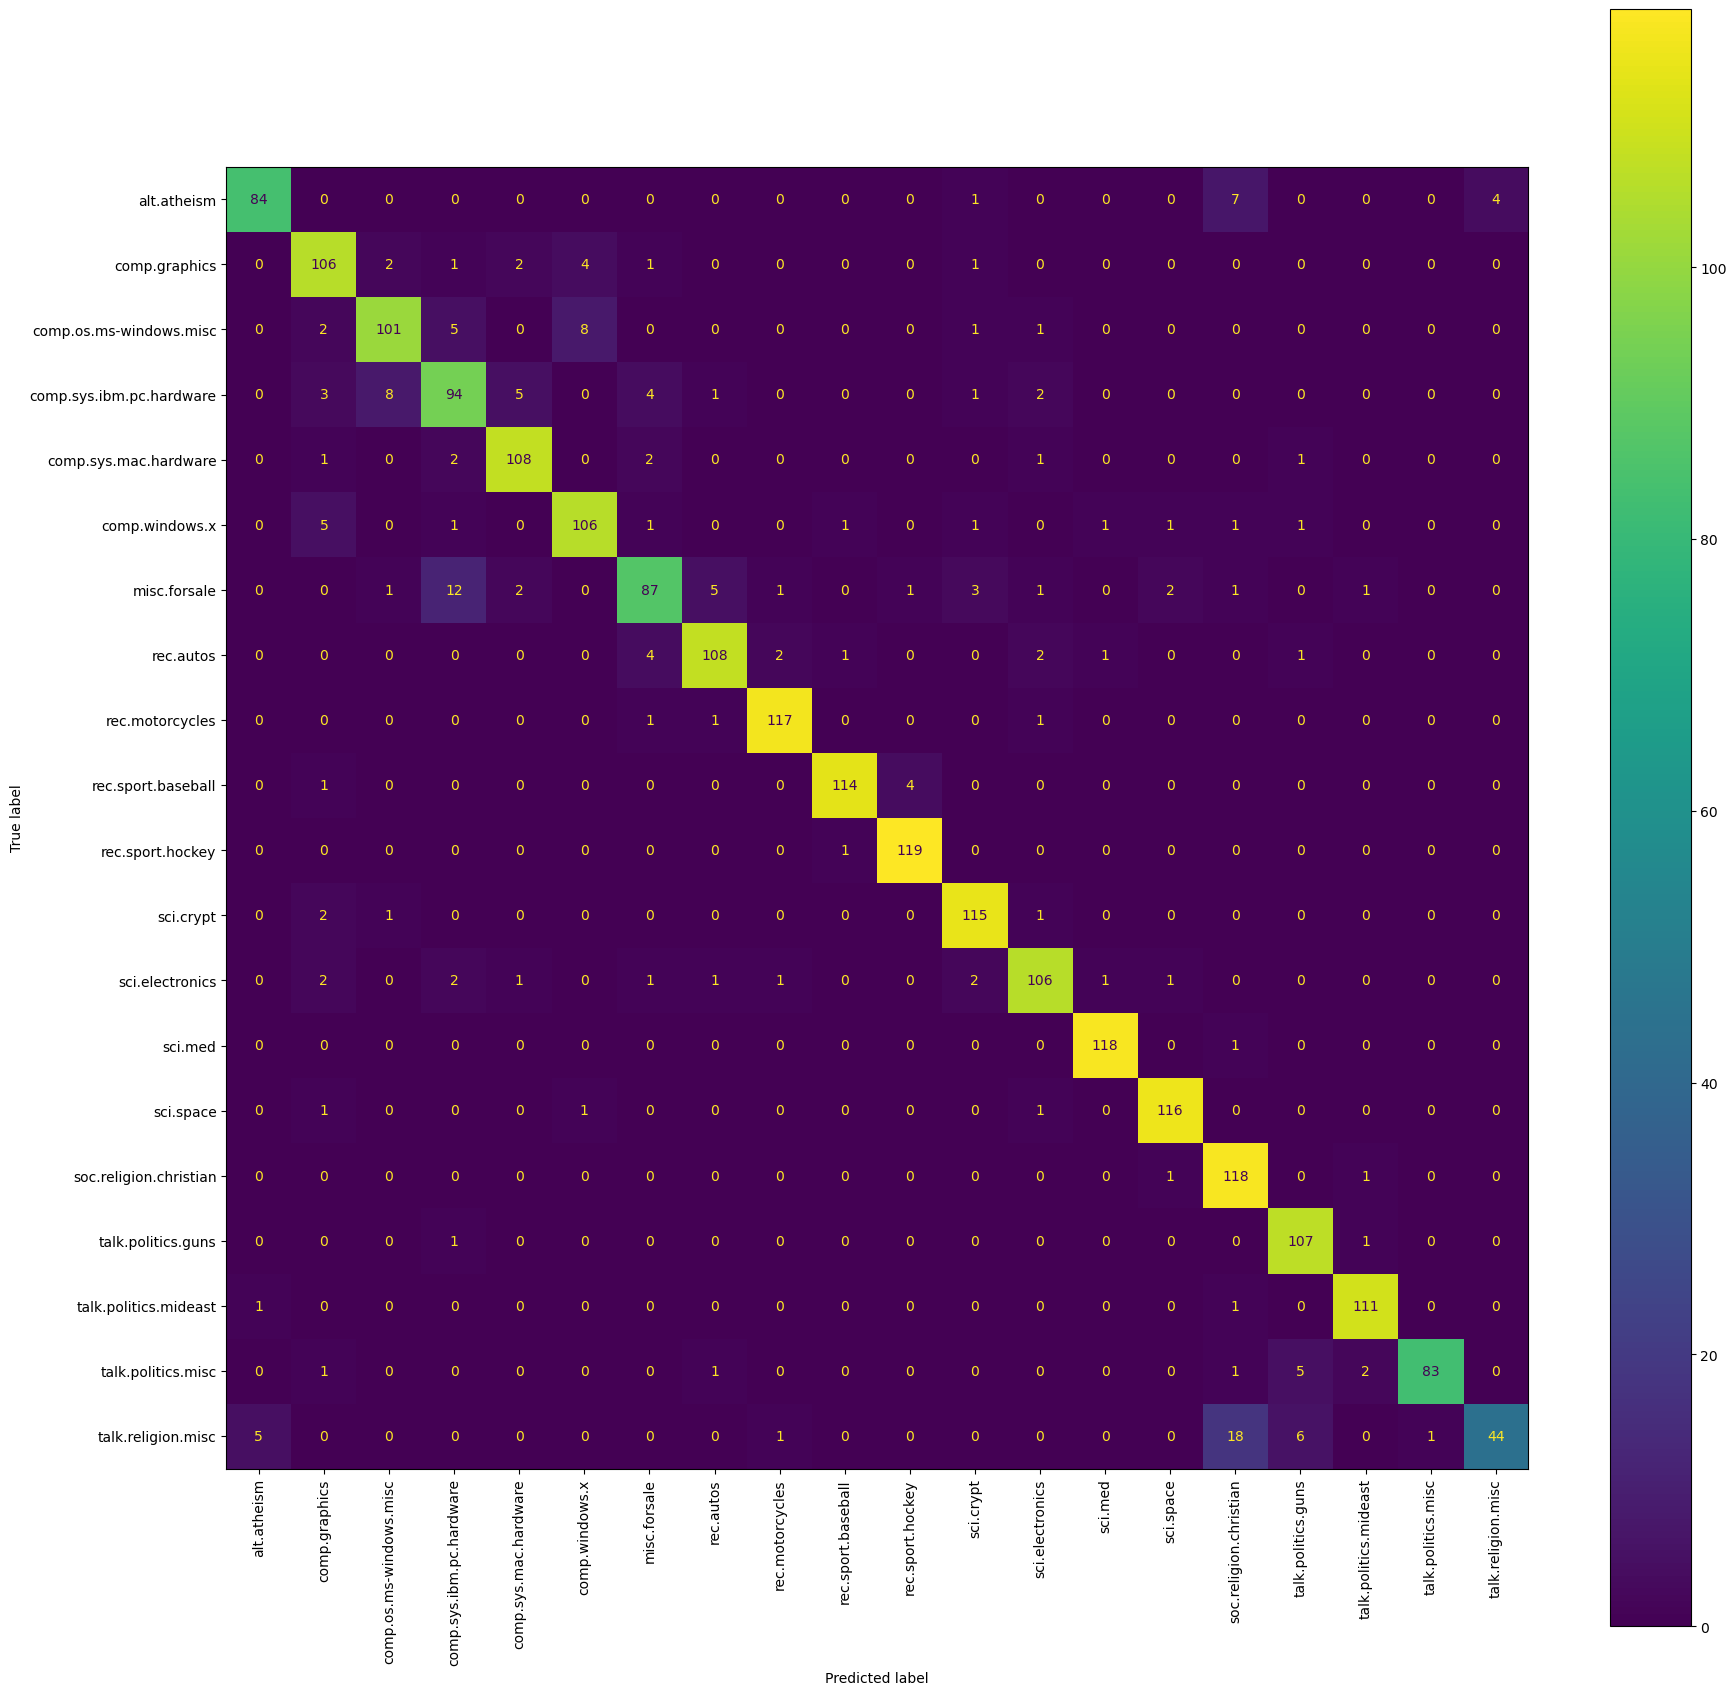

In [26]:
# 3. Plot the confusion matrix of our predictions
# you can use Sklearns `ConfusionMatrixDisplay`
fig, ax = plt.subplots(figsize=(21, 21))
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax);
plt.xticks(rotation=90);

In [27]:
# 4. Using `classification_report` print the evaluation results for all the classes. 
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=model.classes_))

                          precision    recall  f1-score   support

             alt.atheism       0.93      0.88      0.90        96
           comp.graphics       0.85      0.91      0.88       117
 comp.os.ms-windows.misc       0.89      0.86      0.87       118
comp.sys.ibm.pc.hardware       0.80      0.80      0.80       118
   comp.sys.mac.hardware       0.92      0.94      0.93       115
          comp.windows.x       0.89      0.89      0.89       119
            misc.forsale       0.86      0.74      0.80       117
               rec.autos       0.92      0.91      0.92       119
         rec.motorcycles       0.96      0.97      0.97       120
      rec.sport.baseball       0.97      0.96      0.97       119
        rec.sport.hockey       0.96      0.99      0.98       120
               sci.crypt       0.92      0.97      0.94       119
         sci.electronics       0.91      0.90      0.91       118
                 sci.med       0.98      0.99      0.98       119
         

# Manual predicition
Write a new sentence that you think will be classified as talk.politics.guns. 
1. Apply the text pipeline to your sentence
2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`
    * Note, the `transform` function accepts a list and not a individual string.
3. Use the model to predict your new `X`. 
4. Print the prediction

In [28]:
my_sentence = 'Gun control laws continue to be a contentious issue, with advocates on both sides passionately defending their positions.'

# 1. Apply the text pipeline to your sentence
my_sentence_cleaned = textPipeline(my_sentence)
print(my_sentence_cleaned)

# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\
X = vectorizer.transform([my_sentence_cleaned])

# 3. Use the model to predict your new `X`. 
model.predict(X)

# 4. Print the prediction
manual_pred = model.predict_proba(X)
for class_name, percentage in zip(model.classes_, manual_pred.round(3)[0]):
    print(class_name, ': ', percentage)

gun control laws continue contentious issue advocates sides passionately defending positions
alt.atheism :  0.061
comp.graphics :  0.006
comp.os.ms-windows.misc :  0.007
comp.sys.ibm.pc.hardware :  0.01
comp.sys.mac.hardware :  0.01
comp.windows.x :  0.012
misc.forsale :  0.01
rec.autos :  0.053
rec.motorcycles :  0.018
rec.sport.baseball :  0.009
rec.sport.hockey :  0.015
sci.crypt :  0.067
sci.electronics :  0.021
sci.med :  0.023
sci.space :  0.039
soc.religion.christian :  0.061
talk.politics.guns :  0.292
talk.politics.mideast :  0.143
talk.politics.misc :  0.113
talk.religion.misc :  0.031


___
# PART 2: Twitter Data
This part of the exercise is un-guided on purpose.  

Using the `dem-vs-rep-tweets.csv` build a classifier to determine if a tweet was written by a democrat or republican. 

Can you get an f1-score higher than %82

# Load & Display Data

In [29]:
# 1. Load the dem-vs-rep-tweets.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/dem-vs-rep-tweets.csv')
print(df.shape)
df.head()

(86460, 3)


,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


In [30]:
# inspecting/removing nulls & duplicates
print('# of nulls per column: ')
print(df.isnull().sum())
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('# of duplicates: ',df.duplicated().sum())

# of nulls per column: 
Party     0
Handle    0
Tweet     0
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# of duplicates:  57


In [31]:
df = df.drop_duplicates()

In [32]:
print('# of duplicates: ',df.duplicated().sum())

# of duplicates:  0


In [33]:
# find class balances, print out how many of each party tweets there are.
df.Party.value_counts()

# it looks pretty balanced in terms of amount of tweets from both parties

Republican    44362
Democrat      42041
Name: Party, dtype: int64

# Text Pre-processing

In [34]:
# reusing my textPipeline() function to clean the text
df['Tweet_cleaned'] = df['Tweet'].apply(textPipeline)

print(df['Tweet_cleaned'][0])

today senate dems vote savetheinternet proud support similar netneutrality legislation house httpstcon3tggdlu1l


In [35]:
df.head()

,Party,Handle,Tweet,Tweet_cleaned
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...",today senate dems vote savetheinternet proud s...
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,rt winterhavensun winter resident alta vista t...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,rt nbclatino repdarrensoto noted hurricane mar...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,rt nalcabpolicy meeting repdarrensoto thanks t...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,rt vegalteno hurricane season starts june 1st ...


# Text Vectorization

In [36]:
# defining 'X' and 'y' data
X = df['Tweet_cleaned'].values
y = df['Party'].values

In [37]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [38]:
# initializer vectorizer
vectorizer = TfidfVectorizer()

In [39]:
# fit vectorizer
vectorizer.fit(X_train)

TfidfVectorizer()

In [40]:
# transform X data
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

# print shape of X
print('Shape of X_train:', X_train.shape)

Shape of X_train: (69122, 112305)


# Build & Train Model

In [41]:
# using grid search to select alpha
params = { 
    'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    }

grid_search_cv = GridSearchCV(MultinomialNB(), params)

grid_search_cv.fit(X_train, y_train)

print(grid_search_cv.best_params_)

{'alpha': 0.2}


In [42]:
# initialize multinomialNB model
model = MultinomialNB(alpha=0.2)

# fit model
model.fit(X_train, y_train)

MultinomialNB(alpha=0.2)

# Evaluate the Model

In [43]:
# make predictions on testing data
y_pred = model.predict(X_test)

y_pred_proba = model.predict_proba(X_test)

In [44]:
# print accuracy score
accuracy = model.score(X_test, y_test)
print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.816677


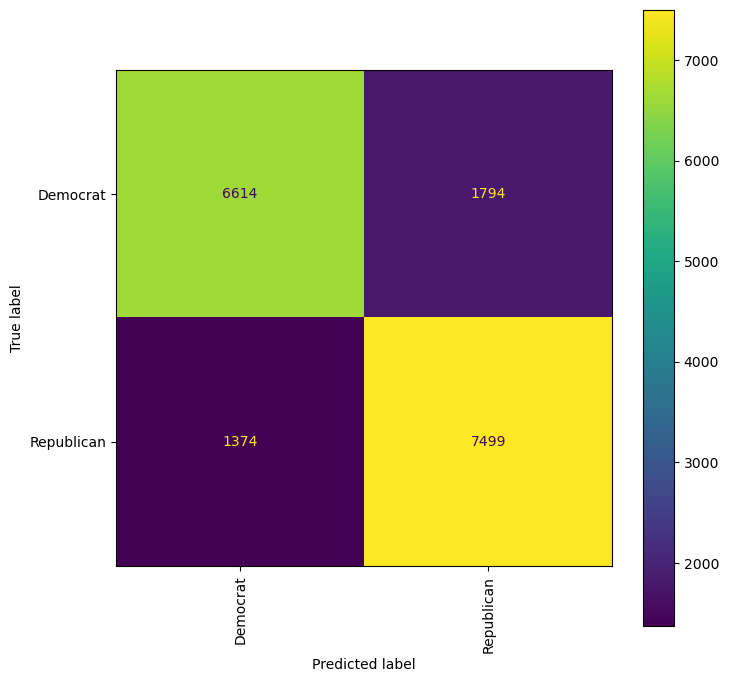

In [45]:
# confusion matrix using ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax);
plt.xticks(rotation=90);

In [46]:
# evaluation results using classification_report
print(classification_report(y_test, y_pred, target_names=model.classes_))

              precision    recall  f1-score   support

    Democrat       0.83      0.79      0.81      8408
  Republican       0.81      0.85      0.83      8873

    accuracy                           0.82     17281
   macro avg       0.82      0.82      0.82     17281
weighted avg       0.82      0.82      0.82     17281



# Hyperparameter Tuning

In [47]:
# using grid search to select alpha
params = { 
    'alpha': [0.13, 0.135, 0.1375, 0.14, 0.1425, 0.145, 0.1475, 0.15],
    'force_alpha': [False, True],
    'fit_prior': [False, True]
    }

grid_search_cv = GridSearchCV(MultinomialNB(), params)

grid_search_cv.fit(X_train, y_train)

print(grid_search_cv.best_params_)

{'alpha': 0.1425, 'fit_prior': True, 'force_alpha': False}


In [48]:
# initialize multinomialNB model
model = MultinomialNB(alpha=0.1425, fit_prior=True, force_alpha=False)

# fit model
model.fit(X_train, y_train)

MultinomialNB(alpha=0.1425, force_alpha=False)

In [49]:
# make predictions on testing data
y_pred = model.predict(X_test)

y_pred_proba = model.predict_proba(X_test)

# print accuracy score
accuracy = model.score(X_test, y_test)
print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.816562


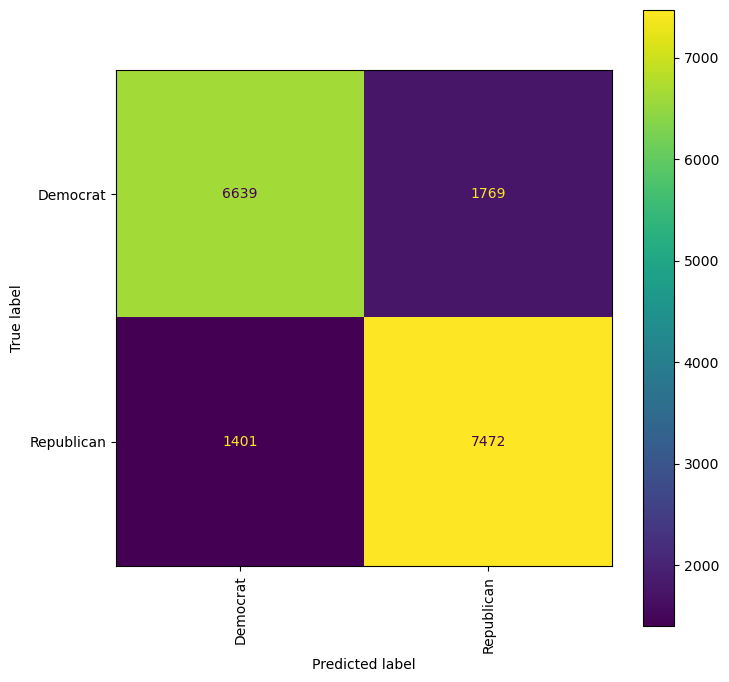

In [50]:
# confusion matrix using ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax);
plt.xticks(rotation=90);

In [51]:
# evaluation results using classification_report
print(classification_report(y_test, y_pred, target_names=model.classes_, digits=4))

              precision    recall  f1-score   support

    Democrat     0.8257    0.7896    0.8073      8408
  Republican     0.8086    0.8421    0.8250      8873

    accuracy                         0.8166     17281
   macro avg     0.8172    0.8159    0.8161     17281
weighted avg     0.8169    0.8166    0.8164     17281



I was able to get the f1 score for Republican Party to 82.5%, but the f1 score for Democrat Party is 80.7%